# OLPF

Al fotografiar una imagen, si el muestreo es ideal, las repeticiones presentes no se solapan entre sí, por lo que cada componente de la imagen puede reconstruirse fielmente; de lo contrario, se produce el fenómeno de aliasing. La restricción del no solapamiento implica que la imagen original se encuentre limitada en frecuencia, pero este requisito no es realista en la práctica en todos los casos. Por ello, en casos reales aparecen efectos de aliasing.

Un **filtro OLPF**, o filtro óptico pasa bajo, consiste de un filtro anti-aliasing integrado en muchas cámaras digitales en la actualidad. El filtro es colocado delante del sensor de la cámara.

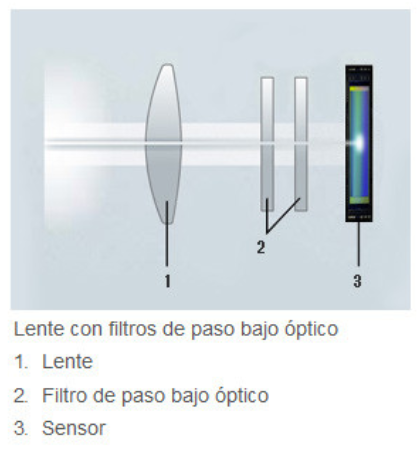

In [1]:
from IPython.display import Image
Image(filename='../../assets/imgs/olpf.PNG') 

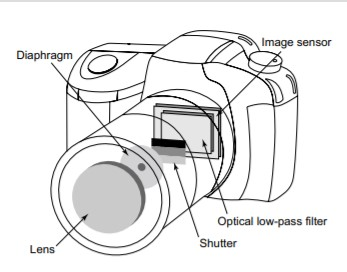

In [2]:
Image(filename='../../assets/imgs/olpfcamera.jpg') 

La función principal del filtro OLPF es filtrar las altas frecuencias y así reducir el efecto Moiré y los falsos colores.

### Efecto Moiré
El efecto Moiré es una percepción visual que se produce al observar un conjunto de líneas o puntos que se superpone a otro conjunto de líneas o puntos, donde los conjuntos difieren en tamaño relativo, ángulo o espaciado. El efecto Moiré se presenta en fotografía cuando ciertos objetos o sectores contienen detalles de pequeño tamaño que se repiten, tales como puntos o líneas, y que se encuentran sobre la resolución del sensor de la cámara. En estos casos, surge en las imágenes resultantes un efecto ondulando que puede desviar la atención del contenido principal de la fotografía. El fenómeno degrada la calidad de las imágenes. 

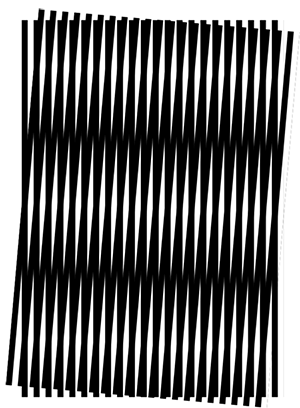

In [3]:
Image(filename='../../assets/imgs/moirelines.png') 

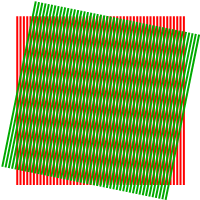

In [4]:
Image(filename='../../assets/imgs/rotating_moire.gif') 

### Falsos Colores
Una imagen se denomina de color verdadero cuando ofrece una representación de color natural o aproximadamente natural. Esto significa que los colores de un objeto en una imagen aparecen a un observador humano de la misma manera que si este mismo observador viera directamente el objeto. La representación absoluta del color verdadero es imposible debido a las diferentes sensibilidades espectrales del ojo humano y de un dispositivo de captura de imágenes, a las diferentes emisiones espectrales o reflejos del objeto y del proceso de representación de imágenes y a las diferencias en la irradiación espectral en el caso de las imágenes reflectantes.

El color que no está presente en el propio objeto, o que se introduce en la fotografía por la iluminación establecida, se conoce como falso color. Los colores falsos son errores de color evidentes que surgen cerca de los límites de los objetos. Este fenómeno, al igual que el Moiré, puede introducirse en una imagen como un artefacto que perjudica a la imagen en general si no se corrige. El falso color puede introducirse con el patrón de Moiré o por sí solo.

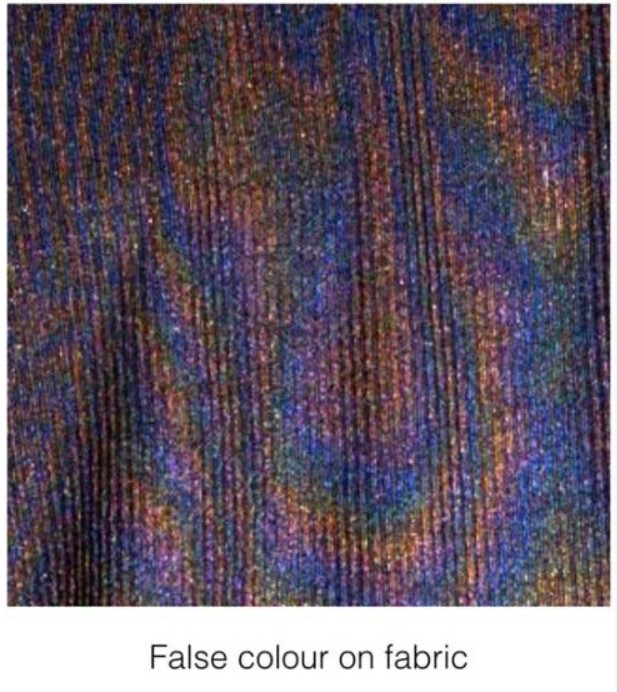

In [5]:
Image(filename='../../assets/imgs/falsecolour.jpg') 

### Causa de los efectos
Los sensores de imagen típicos, como los que se utilizan en las cámaras digitales, se componen de muchos fotosensores individuales, los cuales capturan la luz. Estos fotosensores son capaces de captar la intensidad de la luz, pero no su longitud de onda. Por ello, los sensores de imagen suelen estar recubiertos de algo llamado "matriz de filtros de color". Esta superposición consiste en muchos filtros diminutos que cubren los píxeles conocidos y les permiten representar la información de color.

La matriz Bayer o RGGB fue inventada en 1974 por Bryce Bayer. La disposición utiliza una proporción de dos elementos filtrantes verdes (GG) por cada elemento filtrante rojo (R) y cada azul (B). Esta diferencia es necesaria ya que la retina humana es naturalmente más sensible a la luz verde en la visión diurna.

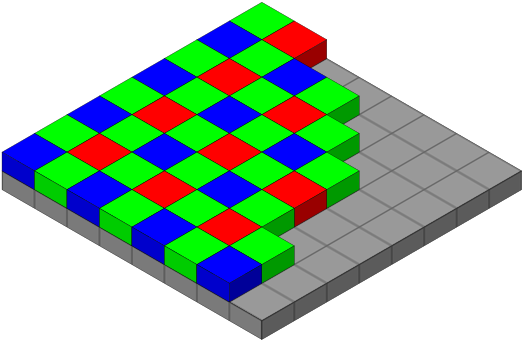

In [6]:
Image(filename='../../assets/imgs/bayer.png') 

Cada píxel está superpuesto por un elemento del filtro Bayer de un componente RGB. Para extrapolar los otros dos componentes, un algoritmo toma de los píxeles circundantes los que presenten superpuesto al componente analizado y promedia su luminancia.

Sin embargo, el filtro Bayer introduce problemas en ciertas fotografías. Para entender la introducción de falsos colores por el filtro Bayer se toma un ejemplo de www.japanistry.com. Se busca obtener la representación digital de una disposición de 3 franjas blancas y negras alternadas con un filtro Bayer.

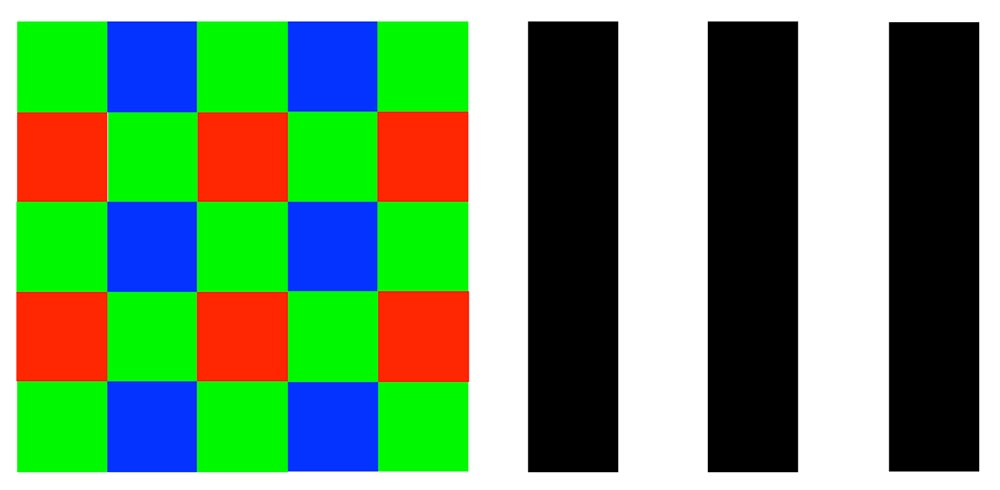

In [7]:
Image(filename='../../assets/imgs/examplefalse.jpg') 

Se registra el valor de la luminancia en cada píxel. El negro tiene un valor RGB de (0, 0, 0), por lo que los dos únicos valores registrados son 0 o 255. A continuación, se ejecuta un algoritmo que extrapola el RGB de cada píxel. Se toma para cada componente el valor medio de los 8 píxeles circundantes relativos a ese componente en particular.


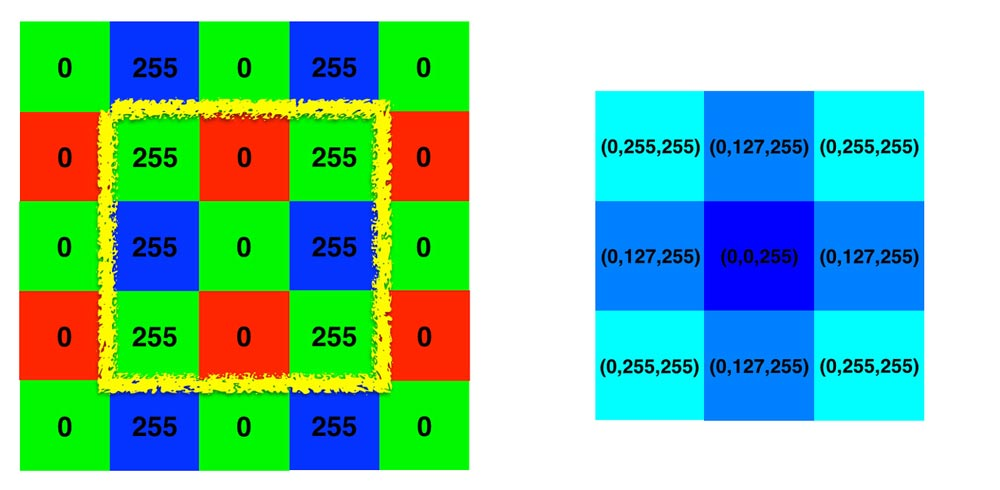

In [8]:
Image(filename='../../assets/imgs/resultbayer.jpg') 


Para el píxel rojo de la parte superior del cuadro amarillo, el componente R del RGB es obtenido directamente del valor obtenido (ya que se trata de un píxel rojo), con lo cual se lo computa como un 0. Luego, para el componente G, se toman de los 8 píxeles circundantes los 4 que correspondan al color verde. 2 de estos tienen un valor de 255 y 2 tienen un valor de 0. Por esta razón, se registra 127, la media entre los valores observados. Por último para el componente B, todos los píxeles azules de los 8 píxeles circundantes tienen un valor de 255, por lo que la media coincide con este valor y se lo registra como 255. El valor RGB del píxel resulta entonces de (0,127,255), creando un falso color en dicho píxel.

Además de falsos colores, este mecanismo puede introducir también efecto Moiré.

## Funcionamiento

En las cámaras digitales, los filtros OLPF dividen a un punto de luz en cuatro puntos individuales. Esta división de la luz aumenta la posibilidad de que los colores sean captados por uno o más píxeles en esa proximidad y, por tanto, limita el Moiré y el falso color. Sin embargo, al repartir el rayo de luz en un área mayor, el coste es una disminución de la nitidez general de la imagen.

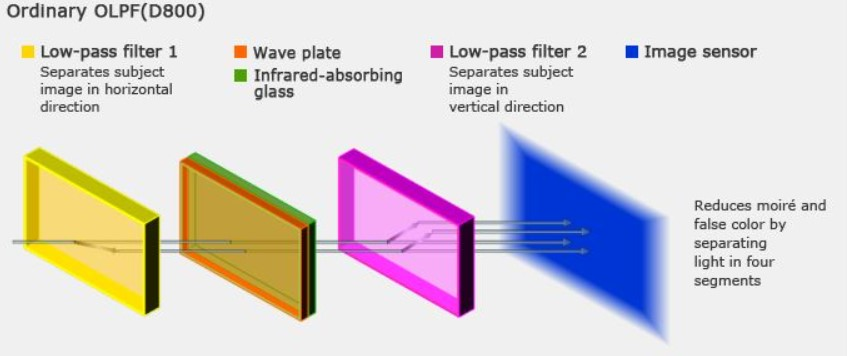

In [9]:
Image(filename='../../assets/imgs/olpflight.jpg') 

Cuando los rayos de luz llegan al primer "filtro horizontal de paso bajo", se dividen en dos, horizontalmente. Posteriormente la placa naranja genera polarización circular en las ondas incidentes y luego, pasan por un filtro de absorción de infrarrojos (ilustrado en color verde).  A continuación, los rayos de luz pasan por el "segundo filtro vertical de paso bajo", que divide aún más los rayos de luz en sentido vertical. Este proceso de conversión de los rayos de luz provoca difuminación de los detalles pero como se mencionó, limita el Moiré y el falso color.

## Aplicación de OLPF

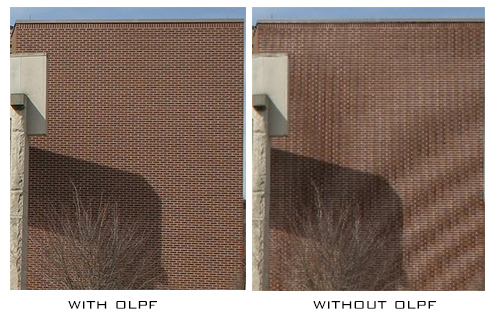

In [10]:
Image(filename='../../assets/imgs/comparison.jpg') 

En la imagen anterior el efecto Moiré presente en la imagen tomada sin OLPF es eliminado con la aplicación de OLPF.

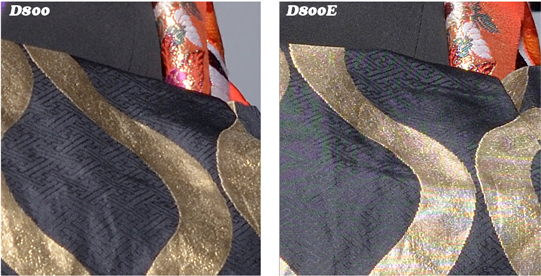

In [11]:
Image(filename='../../assets/imgs/comparisoncolor.jpg') 

Se evidencia una clara disminución del falso color en la imagen resultante de la cámara con OLPF. Sin embargo, el filtro OLPF, al filtrar las altas frecuencias, disminuye levemente la nitidez de la imagen.

## Casos de uso

La D-SLR D800 de Nikon utiliza un filtro óptico de paso bajo para contrarrestar la posibilidad de que se produzca Moiré o falso color en las fotografías digitales.

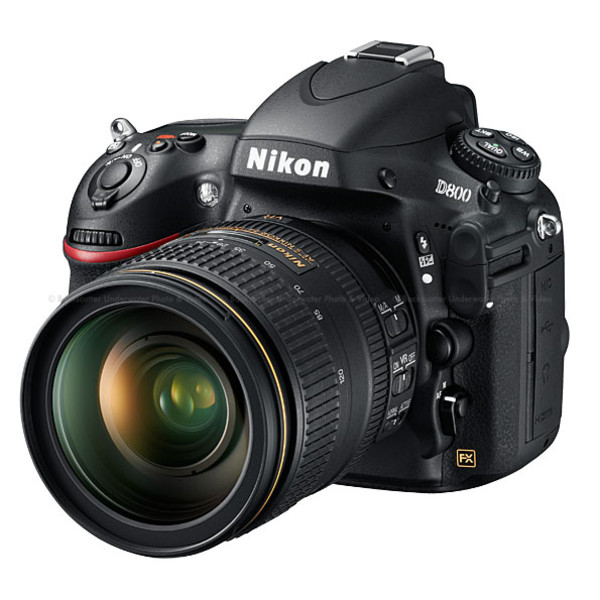

In [12]:
Image(filename='../../assets/imgs/nikond800.jpg') 

Otro caso de uso es la Pentax K5-II, mostrada a continuación.

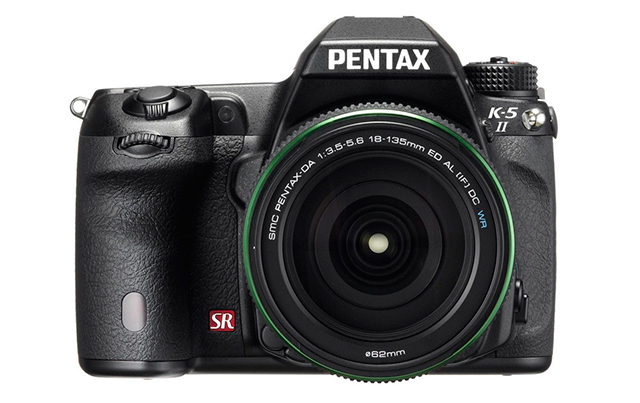

In [13]:
Image(filename='../../assets/imgs/pentax.jpg') 

Este filtro también es introducible en muchas cámaras. Como ejemplo se puede tomar al modelo Blackmagic Pocket Cinema Camera 6K Pro.

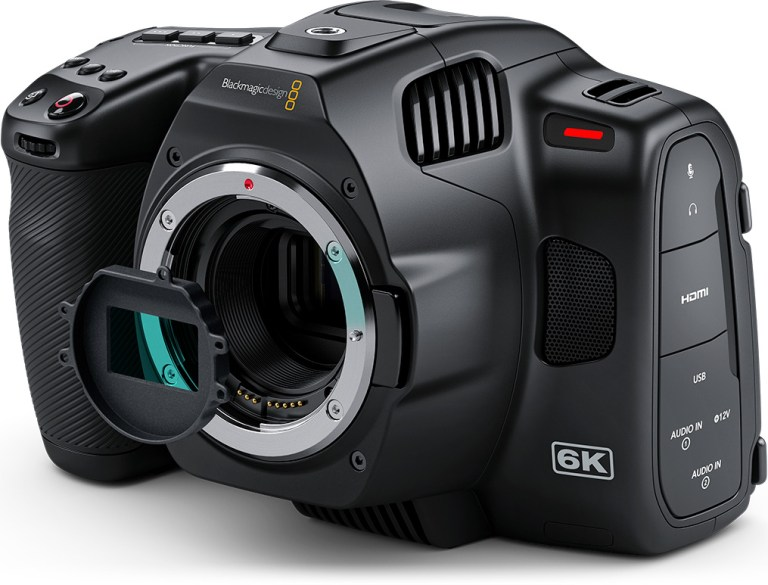

In [14]:
Image(filename='../../assets/imgs/blackmagic1.jpg') 

Si bien el uso de un filtro OLPF es muy común en la actualidad, no todas las cámaras lo utilizan. En 2012, Nikon presentó la D800 y la D800E, que eran idénticas, pero a la D800E se le eliminaron los efectos de su filtro antialiasing (AA). Lo mismo sucede con la Pentax K-5 II, que presenta filtro OLPF, y la Pentax K-5 IIs, que no lo presenta. 

Dado que un filtro AA difumina ligeramente la imagen a nivel de píxel, su ausencia significa imágenes potencialmente más nítidas, aunque con una mayor posibilidad de aliasing y Moiré. Poco después de la Nikon D800E, comenzaron a surgir otras DSLR y modelos sin espejo con filtros AA anulados o eliminados. Actualmente la mayor parte de las empresas de fotografía digital - Canon, Nikon, Pentax, Sigman, Fujifilm, Sony, etc. - ofrecen cámaras sin filtro AA.

Si bien los filtros Bayer y los patrones de cuadrículas pueden producir Moiré y aliasing, cuando la frecuencia de muestreo del sensor es lo suficientemente alta, es decir, cuando el número de píxeles es lo suficientemente alto, el aliasing es menos probable. Por eso, las cámaras de formato medio de hasta 80 megapíxeles y las actuales DSLR de gran número de píxeles y las cámaras sin espejo pueden prescindir del filtro AA. En estos casos la tasa de muestreo es tan alta que el muaré y el aliasing se minimizan. 

La aplicación en la que se utilice la cámara también influye en la decisión de incorporar un filtro o prescindir de él. Dado que los paisajes se componen en gran medida de patrones irregulares, es poco probable se encuentre aliasing. Así, para un fotógrafo de exteriores, las cámaras sin filtro AA deberían ser herramientas valiosas, ya que ofrecen una fina definición y mucho detalle en los paisajes.
